# **Environment News Categorization & Summarization using Python and NLP techniques.**

**Project Goals**
* Categorize environment news articles into topics (e.g., climate, pollution, wildlife).

* Summarize each article to a few key sentences.

* Tools used: Python, Pandas, Scikit-learn, NLTK/Spacy, and Transformers (for summarization).

In [1]:
# Step 1: Install necessary libraries
!pip install pandas scikit-learn nltk spacy transformers --quiet
!python -m nltk.downloader punkt stopwords
!python -m spacy download en_core_web_sm

# Step 2: Import libraries
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from nltk.corpus import stopwords
from transformers import pipeline
import spacy

# Step 3: Load data
df = pd.read_csv('environment_news_sample.csv')
df.dropna(subset=['content'], inplace=True)
print("Total articles:", len(df))

# Step 4: Preprocessing
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return " ".join(tokens)

df['cleaned'] = df['content'].apply(preprocess)

# Step 5: Topic Modeling (Categorization)
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned'])
nmf = NMF(n_components=3, random_state=42)
W = nmf.fit_transform(X)
df['Category'] = W.argmax(axis=1)

topic_keywords = []
for topic_idx, topic in enumerate(nmf.components_):
    top_keywords = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]]
    topic_keywords.append(", ".join(top_keywords))

category_labels = {i: f"Topic {i+1}: {kw}" for i, kw in enumerate(topic_keywords)}
df['Category_Label'] = df['Category'].map(category_labels)

# Step 6: Summarization using transformers
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

def summarize(text):
    try:
        return summarizer(text[:1024], max_length=60, min_length=20, do_sample=False)[0]['summary_text']
    except:
        return ""

df['Summary'] = df['content'].apply(summarize)

# Step 7: Save summarized data
df[['title', 'Category_Label', 'Summary']].to_csv("news_categorized_summary.csv", index=False)
print("✅ Categorization and summarization complete! File saved as news_categorized_summary.csv")


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 97.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Total articles: 10


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 60, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 60, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 60, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 60, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', m

✅ Categorization and summarization complete! File saved as news_categorized_summary.csv


# Now Visualize The Categorized Topics And Summaries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("news_categorized_summary.csv")
df.head()



Saving news_categorized_summary.csv to news_categorized_summary (1).csv


,title,Category_Label,Summary
0,Air Pollution in Delhi Hits Dangerous Levels,"Topic 2: alarming, report, affect, ocean, marine",Delhi's air quality index has crossed the haz...
1,Plastic Waste Found in Deep Ocean Trench,"Topic 2: alarming, report, affect, ocean, marine",Microplastics found in one of the world's dee...
2,Government Launches New Climate Action Plan,"Topic 1: energy, reduce, carbon, emission, gov...",The government announced an ambitious plan to...
3,Wildfires Rage Across Australian Forests,"Topic 1: energy, reduce, carbon, emission, gov...",Massive wildfires have engulfed large parts o...
4,New Species Discovered in Amazon Rainforest,"Topic 3: conference, solution, new, warming, g...",Scientists exploring the Amazon have discover...



* Pie Chart – Topic Distribution


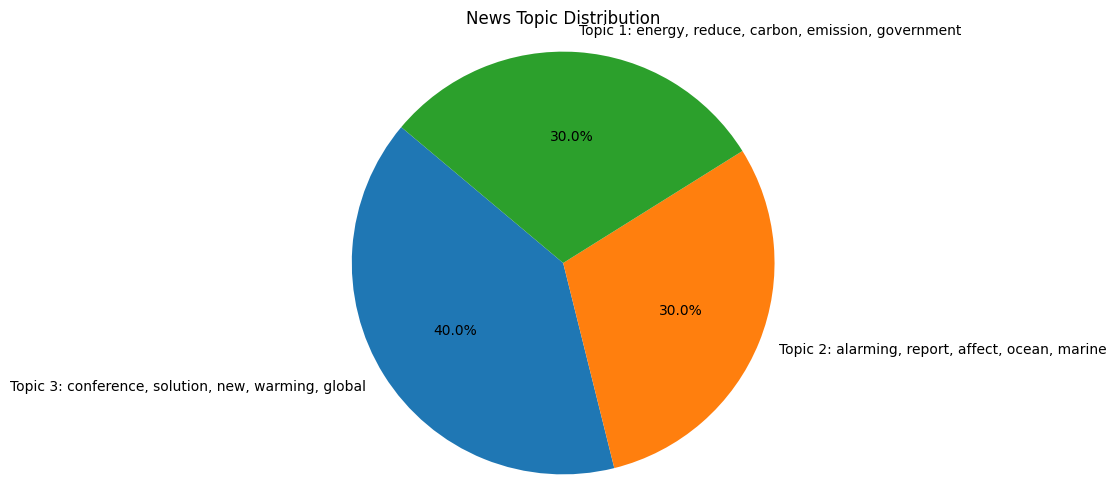

In [3]:
category_counts = df['Category_Label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('News Topic Distribution')
plt.axis('equal')
plt.show()



* Bar Chart – Topic Count


<ipython-input-4-35aac0872fa3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='coolwarm')


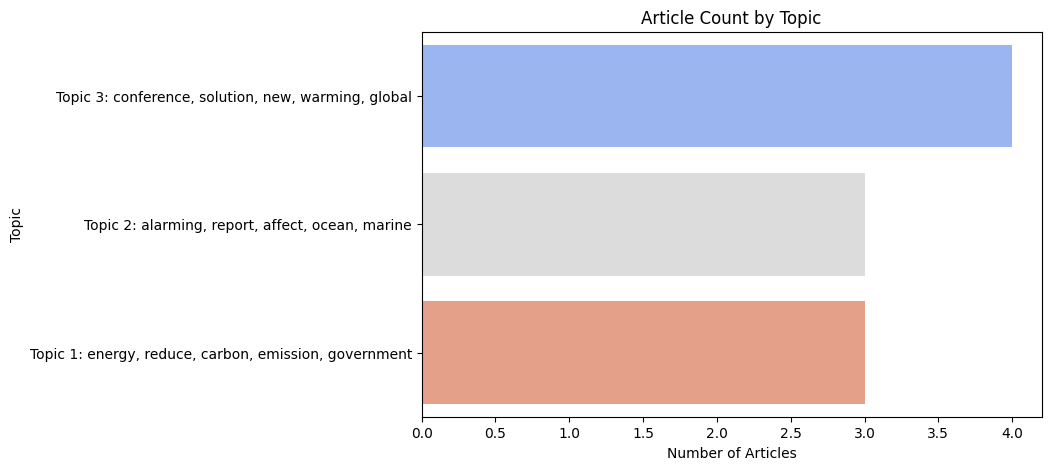

In [4]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='coolwarm')
plt.xlabel("Number of Articles")
plt.ylabel("Topic")
plt.title("Article Count by Topic")
plt.show()



* Word Clouds – One for Each Topic


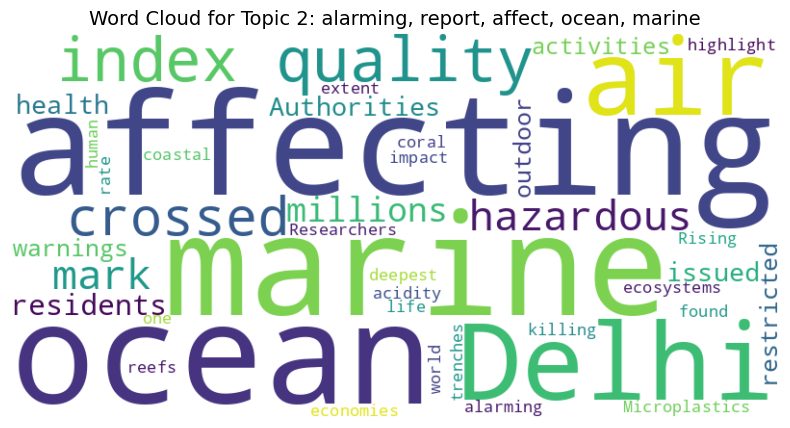

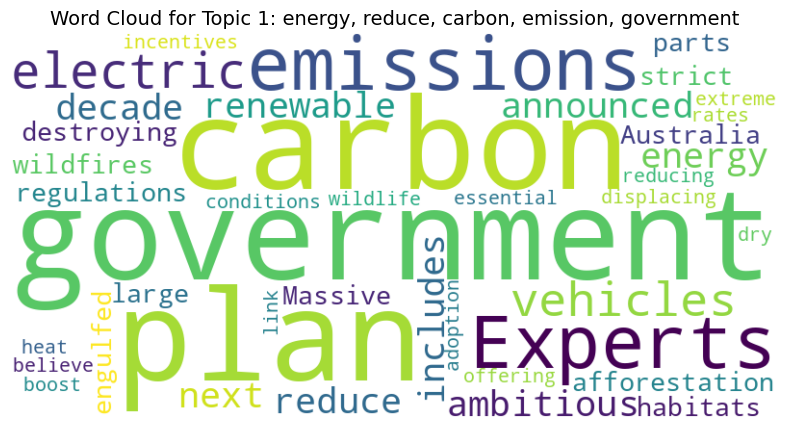

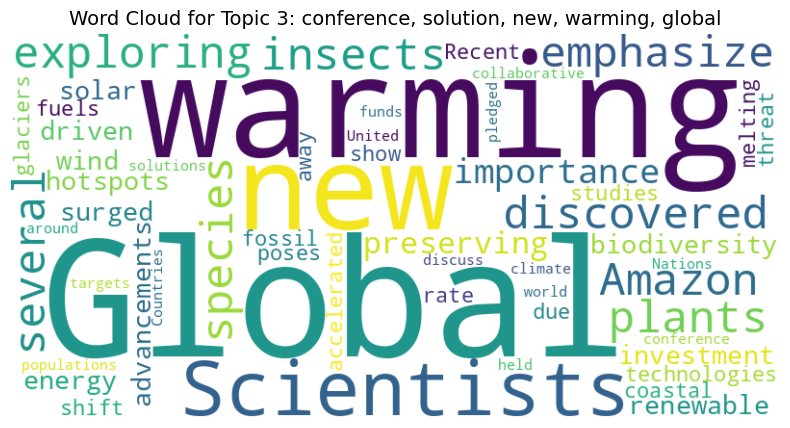

In [5]:
for topic in df['Category_Label'].unique():
    text = " ".join(df[df['Category_Label'] == topic]['Summary'].dropna().tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {topic}", fontsize=14)
    plt.axis('off')
    plt.show()






*   Pie chart: distribution of topics

*   Bar chart: count of articles per topic

*   Word clouds: frequent words for each topic

